<a href="https://colab.research.google.com/github/garvit1818/Arduino-Light-Automation/blob/master/Malaria__Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"garvit1818","key":"90aac2b177291abcd3615b7214a2a0f9"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 97% 328M/337M [00:02<00:00, 111MB/s]
100% 337M/337M [00:02<00:00, 119MB/s]


In [0]:
!unzip cell-images-for-detecting-malaria.zip

Archive:  cell-images-for-detecting-malaria.zip
   creating: cell_images/
   creating: cell_images/Parasitized/
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_171.png  
 extracting: cell_images/Parasitized/C

In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import os
import random
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
infected = os.listdir('cell_images/Parasitized/') 
uninfected = os.listdir('cell_images/Uninfected/')

In [0]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append("1")
        labels.append("1")
        labels.append("1")
        labels.append("1")
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append("0")
        labels.append("0")
        labels.append("0")
        
    except AttributeError:
        print('')

In [0]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [0]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (96453, 50, 50, 3) | labels : (96453,)


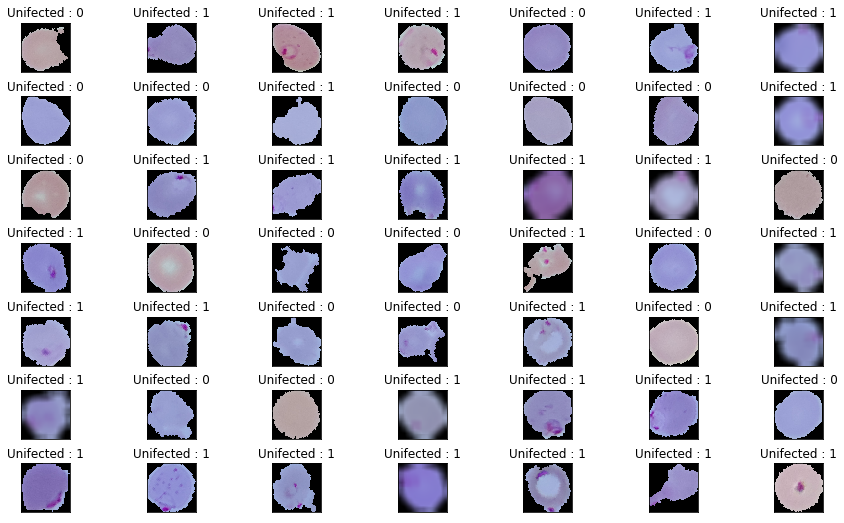

In [0]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

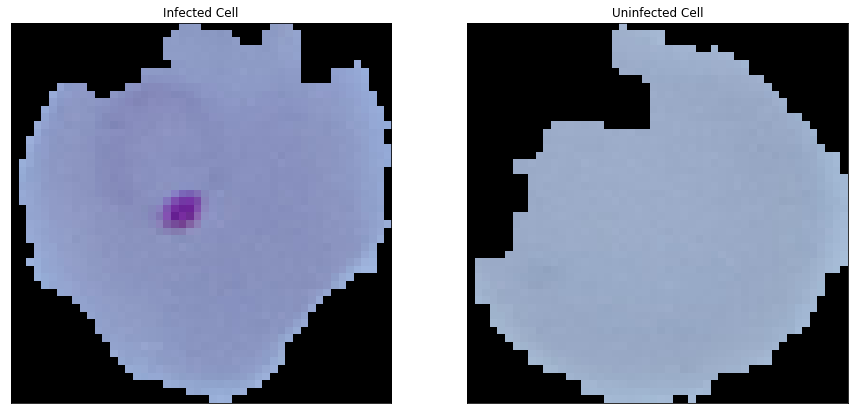

In [0]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[60000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [0]:
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

In [0]:
cells = cells.astype(np.float32)
cells = cells/255

In [0]:
from sklearn.model_selection import train_test_split
import seaborn as sns

train_x , x , train_y , y = train_test_split(cells , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

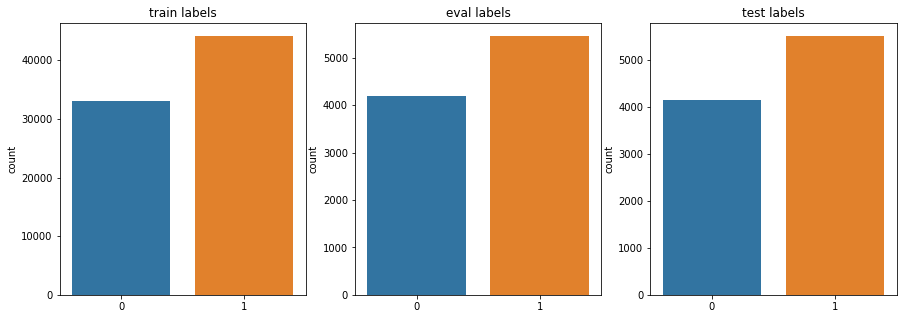

In [0]:
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([train_y , eval_y , test_y] , ['train labels','eval labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()

In [0]:
print('train data shape {} ,eval data shape {} , test data shape {}'.format(train_x.shape,
                                                                           eval_x.shape ,
                                                                           test_x.shape))

train data shape (77162, 50, 50, 3) ,eval data shape (9645, 50, 50, 3) , test data shape (9646, 50, 50, 3)


In [0]:
from keras.models import Sequential
from keras.layers import BatchNormalization,Conv2D,Flatten,MaxPool2D,Dense,Activation

In [0]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(50, 50, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(254,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
__________

In [0]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [0]:
early=EarlyStopping(patience=10)
reduce=ReduceLROnPlateau(monitor='val_acc',factor=0.5,patience=3,min_lr=0.00001,verbose=1)
callback=[early,reduce]

In [0]:
batch_size=50
epoch=20
history=model.fit(train_x, train_y,
              batch_size=batch_size,
              epochs=epoch,
              validation_data=(test_x, test_y),
              shuffle=True)

Train on 77162 samples, validate on 9646 samples
Epoch 1/20
77162/77162 [==============================] - 47s 612us/step - loss: 0.0665 - acc: 0.9768 - val_loss: 0.1177 - val_acc: 0.9655
Epoch 2/20
77162/77162 [==============================] - 44s 569us/step - loss: 0.0584 - acc: 0.9793 - val_loss: 0.1078 - val_acc: 0.9638
Epoch 3/20
77162/77162 [==============================] - 44s 569us/step - loss: 0.0503 - acc: 0.9822 - val_loss: 0.1168 - val_acc: 0.9665
Epoch 4/20
77162/77162 [==============================] - 44s 568us/step - loss: 0.0440 - acc: 0.9850 - val_loss: 0.1295 - val_acc: 0.9602
Epoch 5/20
77162/77162 [==============================] - 44s 569us/step - loss: 0.0399 - acc: 0.9855 - val_loss: 0.1357 - val_acc: 0.9656
Epoch 6/20
77162/77162 [==============================] - 44s 566us/step - loss: 0.0332 - acc: 0.9886 - val_loss: 0.2889 - val_acc: 0.9125
Epoch 7/20
77162/77162 [==============================] - 44s 568us/step - loss: 0.0312 - acc: 0.9890 - val_loss: 0.1

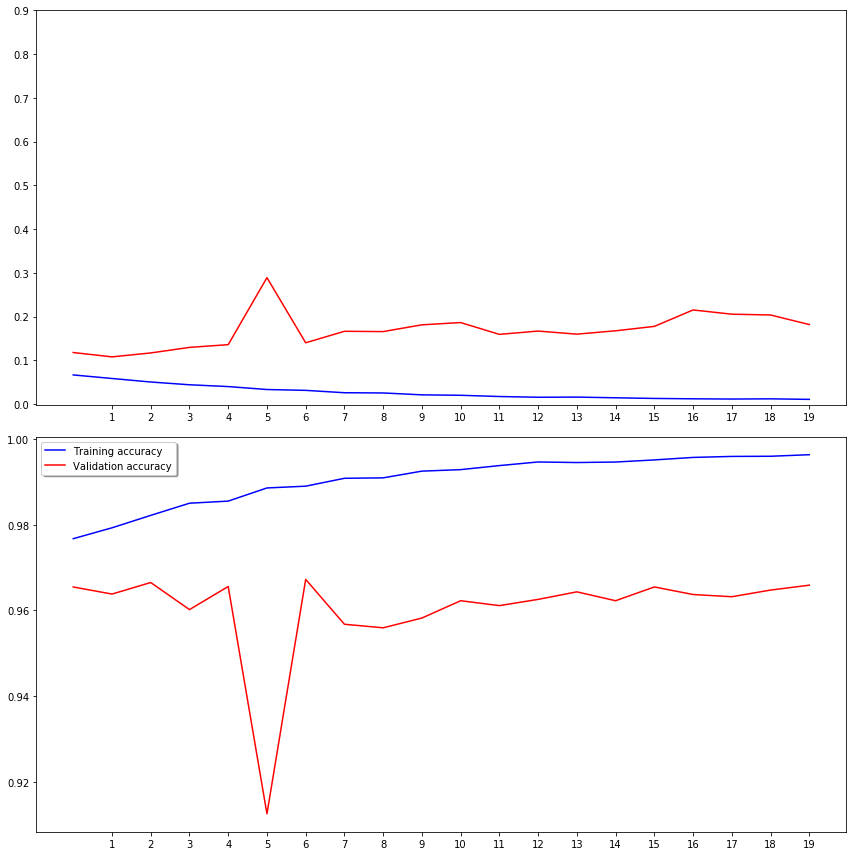

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epoch, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


In [0]:
score, acc = model.evaluate(test_x, test_y,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

9646/9646 [==============================] - 2s 158us/step
Test score: 0.18167425918479743
Test accuracy: 0.9658925995252302


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = "../content/gdrive/My Drive/" 
model.save(path+'malaria_detection.h5') 